<a href="https://colab.research.google.com/github/PoppyDalamaZain/Kelompok3/blob/main/worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Mining Kelompok 3

Ketua : Ahnaf Dzakwan Akbari (11200940000061)

Anggota : 

- Firdha Wulandari (11200940000020)
- Fida Suci Rahmani (11190940000027)
- Poppy Dalama Zain (11200940000042)
- Muhammad Dzakiy (11200940000056)


#Import Packages



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from datetime import datetime
import warnings; warnings.simplefilter('ignore')
#import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

#Memanggil Data

In [21]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/PoppyDalamaZain/Kelompok3/main/data/Case-Study-02-MixITup_.csv
df = pd.read_csv("data/Case-Study-02-MixITup_.csv", low_memory = False, encoding='utf8')
    
df.shape

mkdir: cannot create directory ‘data’: File exists
--2022-10-12 04:06:08--  https://raw.githubusercontent.com/PoppyDalamaZain/Kelompok3/main/data/Case-Study-02-MixITup_.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9296 (9.1K) [text/plain]
Saving to: ‘data/Case-Study-02-MixITup_.csv.3’

Case-Study-02-MixIT 100%[===================>]   9.08K  --.-KB/s    in 0s      

2022-10-12 04:06:08 (102 MB/s) - ‘data/Case-Study-02-MixITup_.csv.3’ saved [9296/9296]



(200, 10)

In [22]:
df.head

<bound method NDFrame.head of       ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran  Menikah  \
0    101        Wanita    49              13114754                52        1   
1    102        Wanita    32              33606557                86        1   
2    103          Pria    51              15983606                41        1   
3    104          Pria    19              12704918                55        0   
4    105        Wanita    38              20081967                42        1   
..   ...           ...   ...                   ...               ...      ...   
195  296          Pria    31               4098360                73        1   
196  297          Pria    57              15983606                51        1   
197  298        Wanita    35              43032786                79        1   
198  299        Wanita    23               1229508                94        1   
199  300          Pria    50               1639344                14        1  

#Melihat Varibel

In [23]:
df.columns

Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

#Jumlah Baris dan Kolom pada data

In [24]:
B, K = df.shape
print('Baris = ', B, ', Kolom = ', K)

Baris =  200 , Kolom =  10


#Melihat Tipe dari setiap Variabel

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    200 non-null    int64 
 1   Jenis Kelamin         200 non-null    object
 2   Umur                  200 non-null    int64 
 3   Pendapatan-per-bulan  200 non-null    int64 
 4   skor-pengeluaran      200 non-null    int64 
 5   Menikah               200 non-null    int64 
 6   Kota                  200 non-null    object
 7   Promo                 200 non-null    int64 
 8   HariFav               200 non-null    object
 9   FavFlavor             200 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 15.8+ KB


#Mengubah object menjadi kategorik

In [26]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
#df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
#df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
#df['FavFlavor'] = df['FavFlavor'].astype('category')


#Menghapus variabel yang tidak diperlukan

In [27]:
data_baru = df.drop(columns = ['ID'])
data_baru

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


In [28]:
data_baru.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

MENGISI MISSING VALUE DI EXCELL
Keterangan :
1. Missing Value di Variabel Gender diisi dengan Wanita (berdasarkan modus)
2. Missing Value di Variabel Menikah diisi dengan angka "1" yang berarti Menikah (berdasarkan modus)
3. Missing Value di Variabel Promo diisi dengan angka "1" yang berati Jarang (berdasarkan modus)
4. Pada Variabel FavFlavor menggati angka "9" dengan angka "0" karena di Data Understanding tidak terdapat angka "9" (berdasarkan modus)
5. Pada Variable FavFlavor terdapat angka "2" namun pada Data Understanding tidak adanya angka "2", lalu disini kita mengasumsikan bahwa angka "2" ada namun di Data Understanding terhapus atau hilang

#Pengecekan Kembali

In [29]:
data_baru.duplicated().sum()

0

#DATA BERSIH

In [30]:
data_baru

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


#VISUALISASI EDA

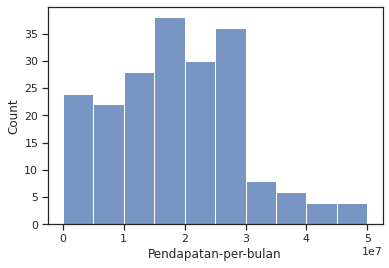

In [31]:
sns.histplot(data=data_baru, x='Pendapatan-per-bulan')

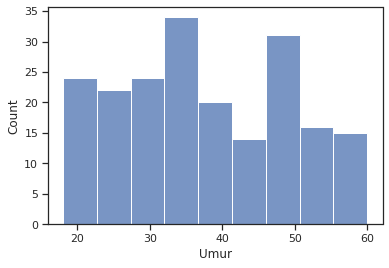

In [32]:
sns.histplot(data=data_baru, x='Umur')

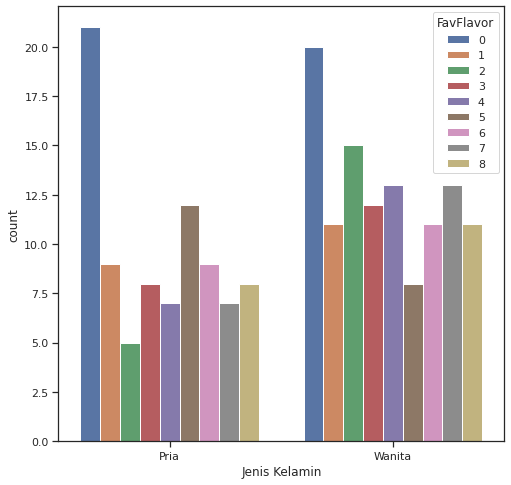

In [33]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="Jenis Kelamin", hue="FavFlavor", data=df)

Rasa Es krim yang cenderung paling banyak diminati dari kalangan pria dan kalangan wanita adalah vanilla. 
Saran yang kami berikan untuk perusahaan MixITup yaitu memperbanyak stok rasa vanila agar selalu tersedia rasa vanilla di outlet dan customer tidak kehabisan untuk mendapatkan vanilla tersebut.
Sedangkan rasa dengan peminat terendah dari kalangan pria adalah rasa bluebery dan kalangan wanita adalah rasa bubblegum/cotton candy, 
sehingga kami ingin perusahaan MixlTup meningkatkan strategi marketing dengan cara memberi promo atau diskon pada rasa blueberry dan bubblegum. Ataupun dapat digabungkan strategi keduanya.
Sebagai contoh karena vnilla merupakan rasa terfavorit, bagi pria yng membeli bluberry akan mendapatkan gratis rsa vanilla, dan untuk wanita jika membeli rasa bubblegum/cotton candy akan mendapatkan free rasa vanilla.

#Menentukan Clustering pada Data

In [34]:
dft = sns.load_dataset('data_baru')
X = dft[['Menikah', 'Promo', 'FavFlavor']]#.values
C = dft['Jenis Kelamin']#.values
print(X.shape)
dft.sample(7)

ValueError: ignored

In [ ]:
g = sns.pairplot(data_baru, hue="Jenis Kelamin")

In [ ]:
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]